In [432]:
import svc
import importlib
importlib.reload(svc)
from svc import SVC
import numpy as np

from sklearn.datasets import make_circles , make_blobs
import matplotlib.pyplot as plt

In [433]:
def get_q(x):
    max_q = 0
    for i in range(len(x)):
        for j in range(i,len(x)):
            if np.linalg.norm(x[i] - x[j])**2 >= max_q:
                max_q = np.linalg.norm(x[i] - x[j])**2
    return 1/max_q


In [434]:
import matplotlib.colors as mcolors
dic=mcolors.CSS4_COLORS
color = list(dic.values())

In [435]:
def calc_and_print_result_classicSVC(p, q, x, y):
    svc = SVC(x,p = p,q=q, is_log=False )
    svc.kernel_matrix()
    svc.find_beta()
    svc.init_vectors_and_rad()
    svc.cluster()
    svc.return_clusters()
    clusters = svc.clusters
    print(f'svs: {len(svc.svs)}  bsv: {len(svc.bsvs)}')
    print(f'clusters: {len(clusters)}')
    print(f'p = {p}, q = {q}')

    mar = ['x' if i in svc.svs else 'P' if i in svc.bsvs else 'o' for i in range(len(x))]
    cmap = plt.get_cmap("brg")
    color=  cmap(np.linspace(0, 1, len(clusters)))
    col = np.zeros(len(x))
    for key,value in clusters.items():
        for i in value:
            col[i] = key
    plt.figure(figsize=(10,10))
    for i in range(len(x)):
        plt.scatter(x[i, 0], x[i, 1], color=color[int(col[i])], marker=mar[i])
    plt.title(f'clusters = {len(clusters)}p = {p}, q = {q}')    

   


In [436]:
def calc_and_print_result_LEESVC(p, q, x, y):
    svc = SVC(x,p = p,q=q, is_log=False )
    svc.kernel_matrix()
    svc.find_beta()
    svc.init_vectors_and_rad()
    svc.LeeDecomposingDataIntoGroups()
    svc.my_part_2()
    clusters = svc.clusters
    print(f'svs: {len(svc.svs)}  bsv: {len(svc.bsvs)} sevs: {len(svc.SEVs)}')
    print(f'clusters: {len(clusters)}')
    print(f'p = {p}, q = {q}')

    mar = ['x' if i in svc.svs else 'P' if i in svc.bsvs else 'o' for i in range(len(x))]
    cmap = plt.get_cmap("brg")
    color=  cmap(np.linspace(0, 1, len(clusters)))
    col = np.zeros(len(x))
    for key,value in clusters.items():
        for i in value:
            col[i] = key
    plt.figure(figsize=(10,10)) 
    for i in range(len(x)):
        plt.scatter(x[i, 0], x[i, 1], color=color[int(col[i])], marker=mar[i], label=col[i])
    scatter = plt.scatter(svc.SEVs[:, 0], svc.SEVs[:, 1], c='r', marker='d', label="SEV")
    plt.title(f'clusters = {len(clusters)}, p = {p}, q = {q}')    
    plt.show()

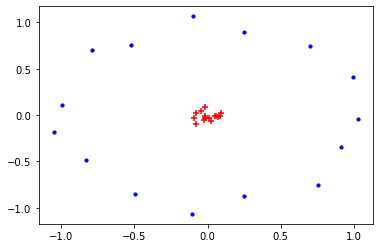

In [437]:

n_samples = 30

samples, labels = make_circles(n_samples=n_samples, factor=.01, noise=.05, random_state=7)

bluecircle = samples[labels==0]
redcircle  = samples[labels==1]

plt.figure()
plt.scatter(bluecircle[:, 0], bluecircle[:, 1], c='b', marker='o', s=10)
plt.scatter(redcircle[:, 0], redcircle[:, 1], c='r', marker='+', s=30)
plt.show()

q = get_q(samples)
p = 0.007


Прошло времени: 1.2042815685272217
svs: 19  bsv: 0
clusters: 16
p = 0.007, q = 0.21969149223453094


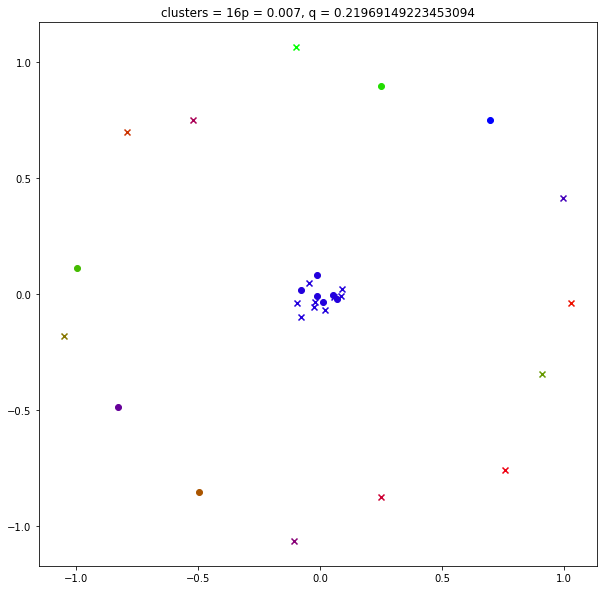

In [438]:
calc_and_print_result_classicSVC(p,q,samples,y=labels)

Прошло времени: 0.46382713317871094
svs: 19  bsv: 0 sevs: 2
clusters: 2
p = 0.007, q = 0.21969149223453094


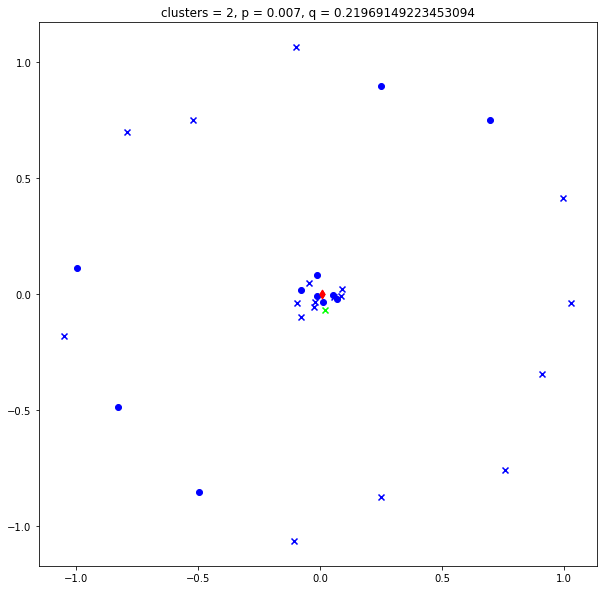

In [439]:
calc_and_print_result_LEESVC(p,q,samples,y=labels)

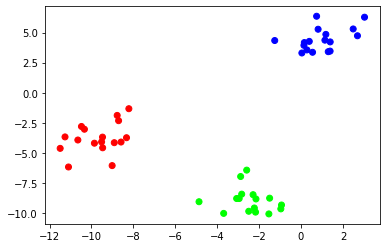

In [440]:
x,y = make_blobs(n_samples=50, random_state=333, centers=3)
plt.figure()
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='brg')

Прошло времени: 3.025543212890625
svs: 42  bsv: 0
clusters: 11
p = 0.007, q = 0.21969149223453094


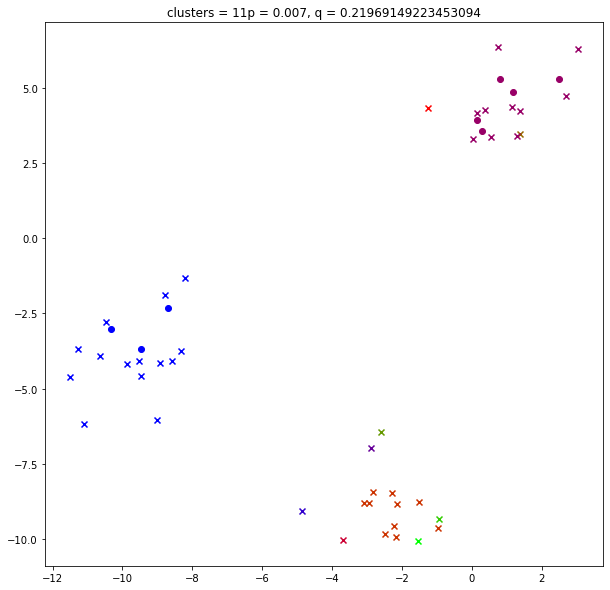

In [441]:
calc_and_print_result_classicSVC(p,q,x,y)

Прошло времени: 2.264530658721924
svs: 42  bsv: 0 sevs: 6
clusters: 6
p = 0.007, q = 0.21969149223453094


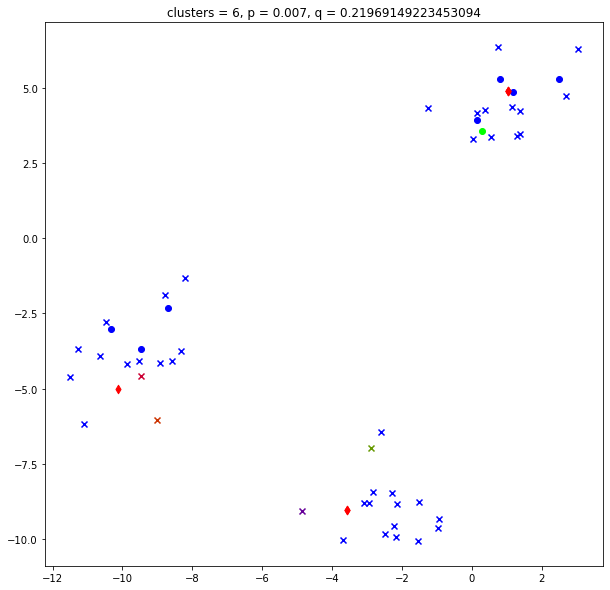

In [442]:
calc_and_print_result_LEESVC(p,q,x,y)